In [2]:
import pandas as pd
import numpy as nump
import glob as g
import matplotlib.pyplot as plt

In [3]:
all_states_csv = g.glob("*.csv")

# gotta shove the csv shtuff up in a dataframe

us_census = pd.DataFrame()

for file in all_states_csv:
    raw = pd.read_csv(file)
    us_census = pd.concat([us_census, raw], ignore_index=True)

In [4]:
us_census.to_csv("us_census.csv", index=False)
# successfully created one jumbo file , still imperfect but we love her
# lets take her to the SALON to clean and tidy up!

# look at her head, will print 10 rows topmost
us_census.head()


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [5]:
us_census['Asian'] = pd.to_numeric(us_census['Asian'].str.replace('%', ''))
us_census['Hispanic'] = pd.to_numeric(us_census['Hispanic'].str.replace('%', ''))
us_census['Income'] = pd.to_numeric(us_census['Income'].replace('\$', '', regex=True))
us_census['Pacific'] = pd.to_numeric(us_census['Pacific'].str.replace('%', ''))
us_census['White'] = pd.to_numeric(us_census['White'].str.replace('%', ''))
us_census['Black'] = pd.to_numeric(us_census['Black'].str.replace('%', ''))
us_census['Native'] = pd.to_numeric(us_census['Native'].str.replace('%', ''))


In [6]:
us_census.reset_index(drop=True)
# gotta split her up , by her I meant the genderpopulation men and wamen
us_census[['men', 'women']] = us_census['GenderPop'].str.split('_', expand=True)

In [7]:
# remove M and F char tyme for converting to its right type
# gotta strip using str.split
# str.split() is a method of string class that is used to split a string into a list, expand=True means expand the split strings into separate columns
us_census['men'] = pd.to_numeric(us_census['men'].str.replace('[,M]', '', regex=True))
us_census['women'] = pd.to_numeric(us_census['women'].str.replace('[,F]', '', regex=True))


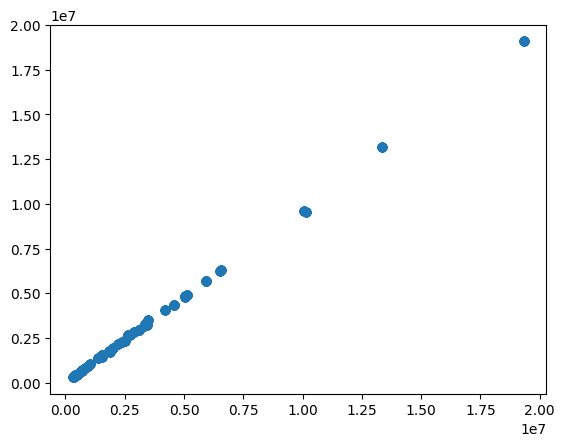

In [8]:
# plt.scatter(the_women_column, the_income_column) Remember to call the alias to show

x = us_census['women']
y = us_census['men']
plt.scatter(x, y)
plt.show()


In [9]:

# printing out the duplicated columns in wamen to see which oens messing us up
# filling nan value in column women with total pop per state minus men per state
us_census['women'] = us_census['women'].fillna(us_census['TotalPop'] - us_census['men'])
print(us_census.duplicated().value_counts())
us_census = us_census.drop_duplicates()
us_census.dropna()

True     1860
False      60
Name: count, dtype: int64


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,men,women
0,0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135M_19334329F,19087135,19334329.0
7,1,Connecticut,3593222,15.604831,67.677053,10.348068,0.126208,4.021981,0.018599,76146.560588,1751607M_1841615F,1751607,1841615.0
9,3,District of Columbia,647484,9.165922,33.103911,51.776536,0.200559,3.383240,0.029609,75466.363636,306674M_340810F,306674,340810.0
10,4,Florida,19645772,21.338543,59.083749,15.165676,0.210451,2.283174,0.051510,50690.194987,9600009M_10045763F,9600009,10045763.0
11,5,Georgia,10006693,8.418242,54.286306,32.088298,0.187583,3.097649,0.046602,50811.082051,4883331M_5123362F,4883331,5123362.0
12,0,Georgia,10006693,8.418242,54.286306,32.088298,0.187583,3.097649,0.046602,50811.082051,4883331M_5123362F,4883331,5123362.0


In [10]:
us_census.isnull()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,men,women
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,True,False,False,False,False
6,False,False,False,False,False,False,False,False,True,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,True,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
pd.read_csv('us_census.csv')

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
...,...,...,...,...,...,...,...,...,...,...,...
1915,1,Vermont,626604,1.6092896174863391%,93.98306010928961%,0.9808743169398909%,0.301639344262295%,1.2387978142076501%,0.03060109289617486%,$55602.96721311475,308573M_318031F
1916,2,Virginia,8256630,8.0110164981373%,63.271048430015945%,20.17599787120807%,0.21245343267695582%,5.455242150079845%,0.06471527408195847%,$72866.01341201717,4060948M_4195682F
1917,3,Washington,6985464,11.140968858131506%,72.03840830449816%,3.384429065743947%,1.4107266435986163%,7.022006920415224%,0.609896193771627%,$64493.76768377254,3487725M_3497739F
1918,4,West Virginia,1851420,1.290909090909089%,92.17623966942146%,3.6628099173553723%,0.15268595041322316%,0.6824380165289253%,0.02644628099173554%,$41437.11157024794,913631M_937789F


In [12]:
us_census['women']

0      2489527.0
1       349215.0
2      3342840.0
3      1506295.0
4     19334329.0
5      2630239.0
6      2630239.0
7      1841615.0
8       478041.0
9       340810.0
10    10045763.0
11     5123362.0
12     5123362.0
13      696428.0
14      806083.0
15     6556862.0
16     3333382.0
17     1558931.0
18     1558931.0
19     1453125.0
20     2233145.0
21     2364097.0
22      679019.0
23     3057895.0
24     3057895.0
25     3455936.0
26     5038598.0
27     2727005.0
28     1536358.0
29     3081445.0
30     3081445.0
31      504536.0
32      939759.0
33     1390901.0
34      670717.0
35     4561386.0
36     4561386.0
37     1051703.0
38    10131373.0
39     5049925.0
40      353677.0
41     5913084.0
42     5913084.0
43     1942789.0
44     1990780.0
45     6534215.0
46     1869213.0
47      543273.0
48      543273.0
49     2455167.0
50      419713.0
51     3331859.0
52    13367298.0
53     1444150.0
54     1444150.0
55      318031.0
56     4195682.0
57     3497739.0
58      937789

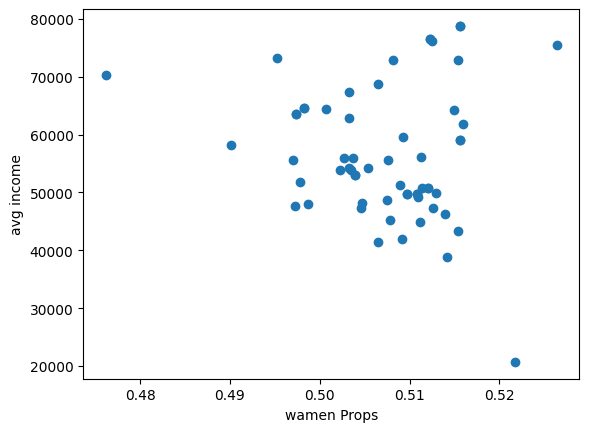

In [13]:
# graph 1 , average income in a state vs the [rp[pstion of women in that state

plt.scatter(us_census['women']/us_census['TotalPop'], us_census['Income'])
plt.xlabel('wamen Props')
plt.ylabel('avg income')
plt.show()

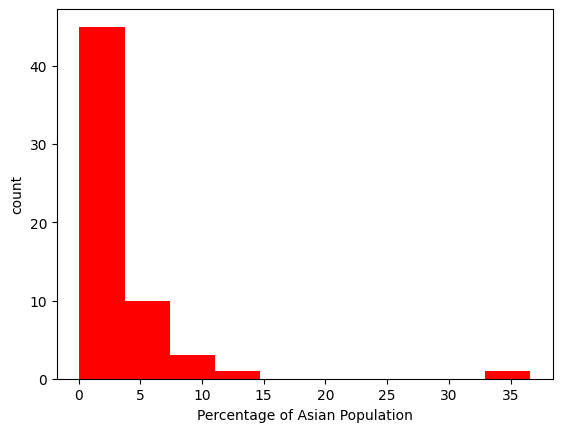

In [14]:
# making histograms of race data in each race , lets do thiss , in seperate files you can checky
plt.hist(us_census['Asian'], color = 'red')
plt.xlabel('Percentage of Asian Population')
plt.ylabel('count')
plt.show()

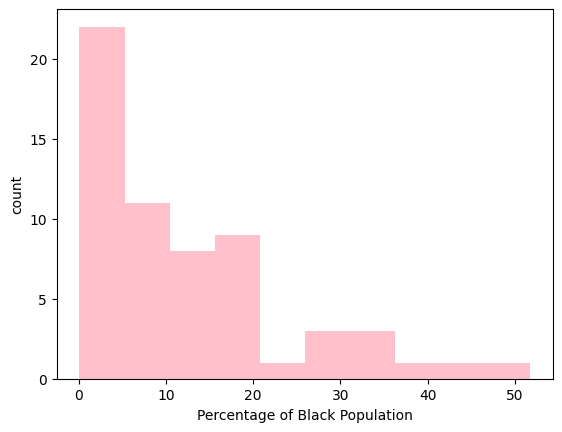

In [15]:
plt.hist(us_census['Black'], color = 'pink')
plt.xlabel('Percentage of Black Population')
plt.ylabel('count')
plt.show()

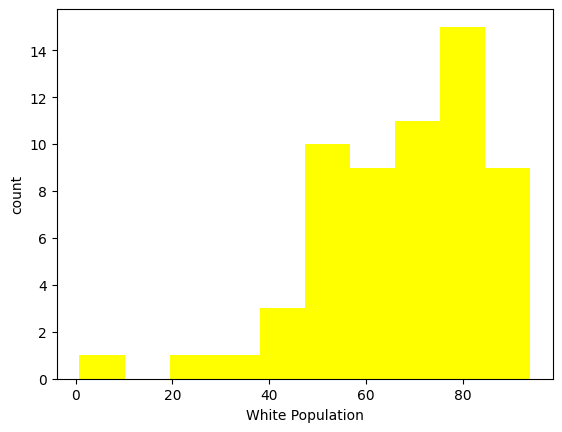

In [16]:
plt.hist(us_census['White'], color='yellow')
plt.xlabel('White Population')
plt.ylabel('count')
plt.show()

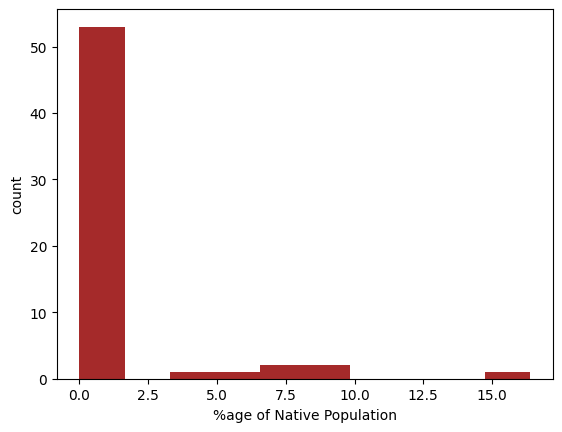

In [17]:
plt.hist(us_census['Native'], color='brown')
plt.xlabel('%age of Native Population')
plt.ylabel('count')
plt.show()

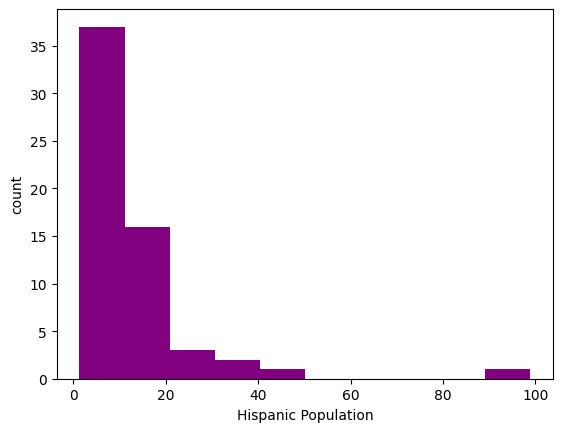

In [18]:
plt.hist(us_census['Hispanic'], color='purple')
plt.xlabel('Hispanic Population')
plt.ylabel('count')
plt.show()

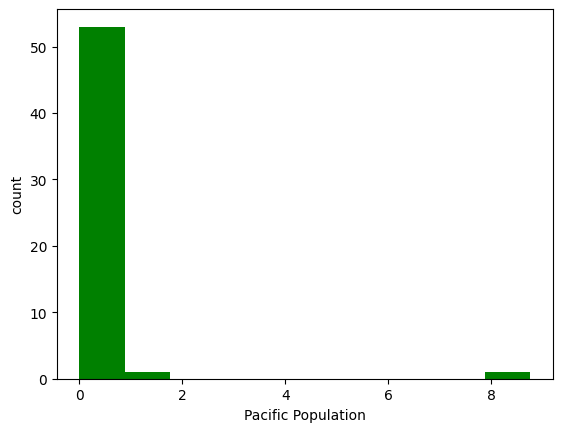

In [19]:
plt.hist(us_census['Pacific'], color='green')
plt.xlabel('Pacific Population')
plt.ylabel('count')
plt.show()

In [20]:

# handling missing data

us_census = us_census.fillna(value={'Asian': 0, 'Black': 0, 'White': 0, 'Pacific': 0, 'Hispanic': 0, 'Native': 0})
